In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [58]:
df = pd.read_csv('data.csv')
print(df.shape)
df.head()

(3519, 55)


,statename,year,month,spend apparel and accessories,spend accommodation and food services,"spend arts, entertainment, and recreation",spend all,spend general merchandise + apparel,spend durable goods,spend general merchandise,...,day,time retail and recreation,time grocery and pharmacy,time parks,time transit stations,time workplaces,time residential,time away from home,spend recovered,emp recovered
0,Alabama,2020,1,0.0000,-1.910000e-09,0.0000,0.0000,-2.880000e-08,3.280000e-08,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
1,Alabama,2020,2,-0.0438,2.160000e-02,0.0643,0.0278,2.020000e-02,1.250000e-02,0.0782,...,29.0,0.0900,0.0414,0.191,0.1070,0.010,-0.00571,0.00855,True,True
2,Alabama,2020,3,-0.3510,-3.800000e-01,-0.3730,-0.0898,-1.460000e-01,-3.850000e-02,0.0646,...,31.0,-0.3340,-0.0643,0.180,-0.2340,-0.344,0.13100,-0.15900,False,False
3,Alabama,2020,4,-0.5350,-6.060000e-01,-0.6520,-0.2290,-3.190000e-01,1.530000e-02,-0.0916,...,30.0,-0.2400,-0.0300,0.143,-0.2300,-0.347,0.12100,-0.14800,False,False
4,Alabama,2020,5,-0.1820,-3.820000e-01,-0.4720,-0.1010,-7.270000e-02,1.720000e-01,0.0279,...,31.0,-0.0914,0.0314,0.373,-0.0371,-0.236,0.08290,-0.09430,False,False


In [59]:
# Identify numeric and categorical columns
cat_cols = ['statename', 'year', 'month']
num_cols = [c for c in df.columns if c not in cat_cols + ['emp recovered', 'spend recovered']]
num_cols

['spend apparel and accessories',
 'spend accommodation and food services',
 'spend arts, entertainment, and recreation',
 'spend all',
 'spend general merchandise + apparel',
 'spend durable goods',
 'spend general merchandise',
 'spend grocery and food stores',
 'spend health care and social assistance',
 'spend home improvement centers',
 'spend other in-person services',
 'spend non-durable goods',
 'spend remote services',
 'spend transportation and warehousing',
 'spend all_incmiddle',
 'spend all q1',
 'spend all q2',
 'spend all q3',
 'spend all q4',
 'spend in-person services',
 'spend retail excluding grocery',
 'spend retail including grocery',
 'day_endofweek',
 'emp all',
 'emp q1',
 'emp q2',
 'emp q3',
 'emp q4',
 'emp inc middle',
 'emp inc below_median',
 'emp inc above median',
 'emp trade_transport utilities',
 'emp professional business_services',
 'emp education health services',
 'emp leisure hospitality',
 'case_rate',
 'death_rate',
 'test_rate',
 'vaccine_rate'

In [60]:
nan_prop = df[num_cols].notna().mean().sort_values()
bad_cols = nan_prop[nan_prop < .7].index
bad_cols

Index(['booster_first_rate', 'emp inc above median', 'emp q4',
       'fullvaccine_rate', 'vaccine_rate', 'test_rate', 'time away from home',
       'time retail and recreation', 'time grocery and pharmacy', 'time parks',
       'time transit stations', 'time workplaces', 'day', 'time residential',
       'case_rate'],
      dtype='object')

In [61]:
data = df.drop(columns=bad_cols)
data = data.dropna(subset=['spend recovered', 'emp recovered'])
data

,statename,year,month,spend apparel and accessories,spend accommodation and food services,"spend arts, entertainment, and recreation",spend all,spend general merchandise + apparel,spend durable goods,spend general merchandise,...,emp inc middle,emp inc below_median,emp trade_transport utilities,emp professional business_services,emp education health services,emp leisure hospitality,death_rate,hospitalized_rate,spend recovered,emp recovered
0,Alabama,2020,1,0.0000,-1.910000e-09,0.0000,0.0000,-2.880000e-08,3.280000e-08,0.0000,...,0.00311,-0.00574,-0.0355,-0.00263,0.01070,-0.0168,NaN,NaN,True,False
1,Alabama,2020,2,-0.0438,2.160000e-02,0.0643,0.0278,2.020000e-02,1.250000e-02,0.0782,...,0.02030,0.00962,0.0163,-0.00342,0.05050,-0.0200,NaN,NaN,True,True
2,Alabama,2020,3,-0.3510,-3.800000e-01,-0.3730,-0.0898,-1.460000e-01,-3.850000e-02,0.0646,...,-0.05100,-0.13900,-0.1420,-0.05530,-0.08330,-0.3190,0.017158,0.101591,False,False
3,Alabama,2020,4,-0.5350,-6.060000e-01,-0.6520,-0.2290,-3.190000e-01,1.530000e-02,-0.0916,...,-0.14700,-0.30700,-0.2700,-0.17100,-0.23600,-0.5410,2.257533,7.704000,False,False
4,Alabama,2020,5,-0.1820,-3.820000e-01,-0.4720,-0.1010,-7.270000e-02,1.720000e-01,0.0279,...,-0.13100,-0.22100,-0.2040,-0.28300,-0.12200,-0.2460,8.786129,8.569677,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3510,Wyoming,2025,1,0.0455,1.460000e-01,0.1360,0.2940,7.830000e-01,1.820000e-01,1.3400,...,0.22800,0.15600,0.3980,0.37400,0.01100,NaN,401.483871,NaN,True,True
3511,Wyoming,2025,2,-0.0565,1.190000e-01,0.0840,0.2940,6.850000e-01,2.100000e-01,1.2800,...,0.25500,0.19500,0.3390,0.40500,0.00873,NaN,402.607143,NaN,True,True
3512,Wyoming,2025,3,-0.0124,2.410000e-01,0.5790,0.3800,7.300000e-01,2.960000e-01,1.3600,...,0.17700,0.20100,0.3010,0.43800,-0.02130,NaN,403.612903,NaN,True,True
3513,Wyoming,2025,4,-0.0125,2.250000e-01,0.3890,0.3850,6.630000e-01,3.230000e-01,1.2000,...,0.14800,0.17600,0.3430,0.39900,-0.02650,NaN,404.000000,NaN,True,True


In [62]:
num_cols = [c for c in data.columns if c not in cat_cols + ['emp recovered', 'spend recovered']]
for col in num_cols:
    data[col] = data[col].fillna(data[col].mean())

In [63]:
data

,statename,year,month,spend apparel and accessories,spend accommodation and food services,"spend arts, entertainment, and recreation",spend all,spend general merchandise + apparel,spend durable goods,spend general merchandise,...,emp inc middle,emp inc below_median,emp trade_transport utilities,emp professional business_services,emp education health services,emp leisure hospitality,death_rate,hospitalized_rate,spend recovered,emp recovered
0,Alabama,2020,1,0.0000,-1.910000e-09,0.0000,0.0000,-2.880000e-08,3.280000e-08,0.0000,...,0.00311,-0.00574,-0.0355,-0.00263,0.01070,-0.016800,255.462659,11.618989,True,False
1,Alabama,2020,2,-0.0438,2.160000e-02,0.0643,0.0278,2.020000e-02,1.250000e-02,0.0782,...,0.02030,0.00962,0.0163,-0.00342,0.05050,-0.020000,255.462659,11.618989,True,True
2,Alabama,2020,3,-0.3510,-3.800000e-01,-0.3730,-0.0898,-1.460000e-01,-3.850000e-02,0.0646,...,-0.05100,-0.13900,-0.1420,-0.05530,-0.08330,-0.319000,0.017158,0.101591,False,False
3,Alabama,2020,4,-0.5350,-6.060000e-01,-0.6520,-0.2290,-3.190000e-01,1.530000e-02,-0.0916,...,-0.14700,-0.30700,-0.2700,-0.17100,-0.23600,-0.541000,2.257533,7.704000,False,False
4,Alabama,2020,5,-0.1820,-3.820000e-01,-0.4720,-0.1010,-7.270000e-02,1.720000e-01,0.0279,...,-0.13100,-0.22100,-0.2040,-0.28300,-0.12200,-0.246000,8.786129,8.569677,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3510,Wyoming,2025,1,0.0455,1.460000e-01,0.1360,0.2940,7.830000e-01,1.820000e-01,1.3400,...,0.22800,0.15600,0.3980,0.37400,0.01100,-0.179739,401.483871,11.618989,True,True
3511,Wyoming,2025,2,-0.0565,1.190000e-01,0.0840,0.2940,6.850000e-01,2.100000e-01,1.2800,...,0.25500,0.19500,0.3390,0.40500,0.00873,-0.179739,402.607143,11.618989,True,True
3512,Wyoming,2025,3,-0.0124,2.410000e-01,0.5790,0.3800,7.300000e-01,2.960000e-01,1.3600,...,0.17700,0.20100,0.3010,0.43800,-0.02130,-0.179739,403.612903,11.618989,True,True
3513,Wyoming,2025,4,-0.0125,2.250000e-01,0.3890,0.3850,6.630000e-01,3.230000e-01,1.2000,...,0.14800,0.17600,0.3430,0.39900,-0.02650,-0.179739,404.000000,11.618989,True,True


In [64]:
# Targets
targets = ['emp recovered', 'spend recovered']

# Numerical and categorical columns
cat_cols = ['statename', 'year', 'month']
num_cols = [c for c in data.columns if c not in targets + cat_cols]

# Split once, re-use same splits for both models and both targets
train_df, test_df = train_test_split(
    data,
    test_size=0.3,
    random_state=42,
    stratify=data['emp recovered']  # or any target with roughly balanced classes
)

In [65]:
def make_pipeline(num_cols, cat_cols, model):
    pre = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_cols),
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
        ]
    )
    return Pipeline([
        ('pre', pre),
        ('clf', model)
    ])


### Cross Validation

In [71]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

models = {
    'LDA': LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'),
    'QDA': QuadraticDiscriminantAnalysis(reg_param=0.1)
}

cv_results = []

for target in targets:
    y = data[target].astype(int)
    X = data[num_cols + cat_cols]

    for name, model in models.items():
        pipe = make_pipeline(num_cols, cat_cols, model)
        
        # Cross-validation accuracy
        scores = cross_val_score(pipe, X, y, cv=cv, scoring='accuracy')
        
        cv_results.append({
            'Target': target,
            'Model': name,
            'CV Accuracy Mean': np.mean(scores),
            'CV Accuracy Std': np.std(scores),
            'CV Error Mean': 1 - np.mean(scores)
        })

# Show results
cv_results_df = pd.DataFrame(cv_results)
cv_results_df

,Target,Model,CV Accuracy Mean,CV Accuracy Std,CV Error Mean
0,emp recovered,LDA,0.957012,0.009217,0.042988
1,emp recovered,QDA,0.946646,0.007342,0.053354
2,spend recovered,LDA,0.957622,0.010446,0.042378
3,spend recovered,QDA,0.873476,0.007150,0.126524


In [72]:
best_models = cv_results_df.loc[cv_results_df.groupby('Target')['CV Accuracy Mean'].idxmax()]
print("Best model(s) based on cross-validation:")
best_models

Best model(s) based on cross-validation:


,Target,Model,CV Accuracy Mean,CV Accuracy Std,CV Error Mean
0,emp recovered,LDA,0.957012,0.009217,0.042988
2,spend recovered,LDA,0.957622,0.010446,0.042378


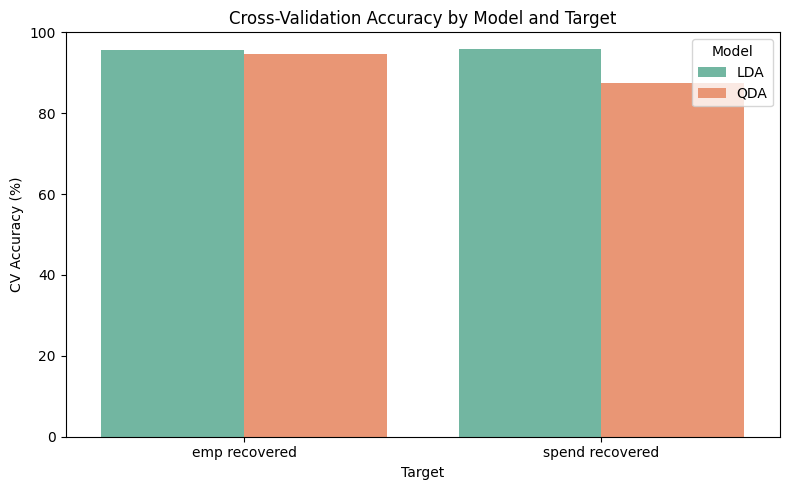

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy of your cv_results_df for plotting
plot_df = cv_results_df.copy()
plot_df['CV Accuracy (%)'] = plot_df['CV Accuracy Mean'] * 100

plt.figure(figsize=(8,5))
sns.barplot(
    data=plot_df,
    x='Target',
    y='CV Accuracy (%)',
    hue='Model',
    palette='Set2'
)
plt.title('Cross-Validation Accuracy by Model and Target')
plt.ylim(0, 100)
plt.ylabel('CV Accuracy (%)')
plt.xlabel('Target')
plt.legend(title='Model')
plt.tight_layout()
plt.show()


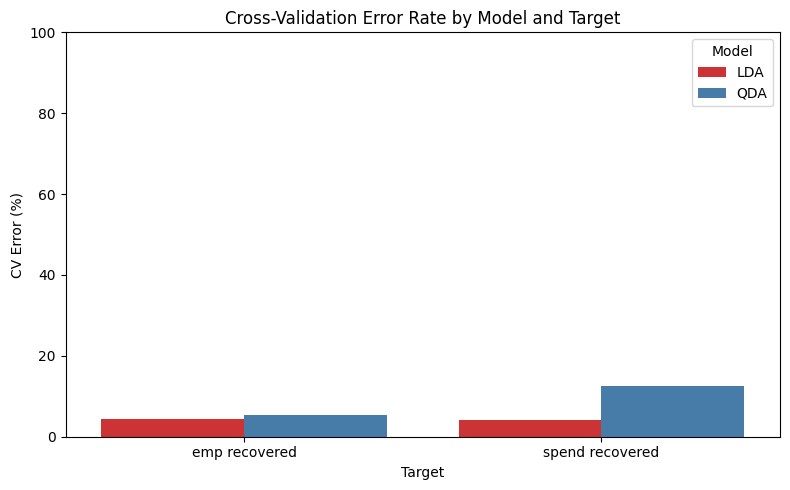

In [76]:
plot_df['CV Error (%)'] = plot_df['CV Error Mean'] * 100

plt.figure(figsize=(8,5))
sns.barplot(
    data=plot_df,
    x='Target',
    y='CV Error (%)',
    hue='Model',
    palette='Set1'
)
plt.title('Cross-Validation Error Rate by Model and Target')
plt.ylim(0, 100)
plt.ylabel('CV Error (%)')
plt.xlabel('Target')
plt.legend(title='Model')
plt.tight_layout()
plt.show()


/var/folders/yv/3lglc4f100sfpf5swdz5lw7r0000gn/T/ipykernel_38920/2524571665.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


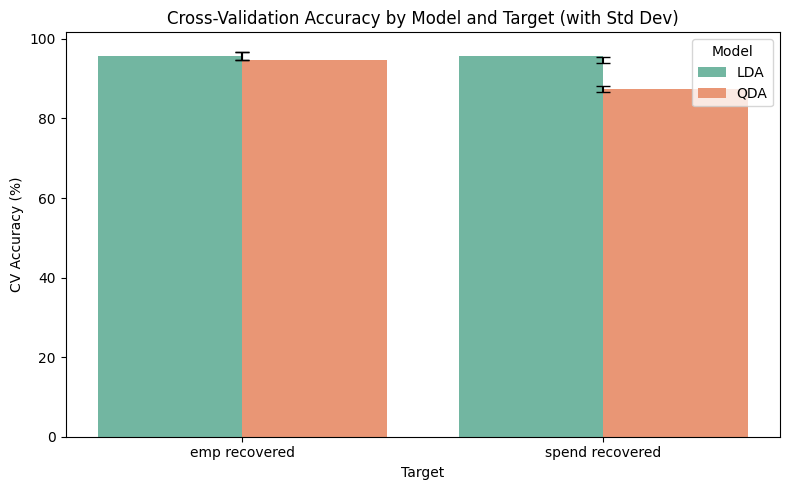

In [77]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=plot_df,
    x='Target',
    y='CV Accuracy (%)',
    hue='Model',
    palette='Set2',
    ci=None
)

# Add error bars manually
for i, row in plot_df.iterrows():
    plt.errorbar(
        x=i%2,  # 0 or 1 for LDA/QDA bar positions
        y=row['CV Accuracy (%)'],
        yerr=row['CV Accuracy Std']*100,
        fmt='none',
        c='black',
        capsize=5
    )

plt.title('Cross-Validation Accuracy by Model and Target (with Std Dev)')
plt.ylabel('CV Accuracy (%)')
plt.xlabel('Target')
plt.legend(title='Model')
plt.tight_layout()
plt.show()


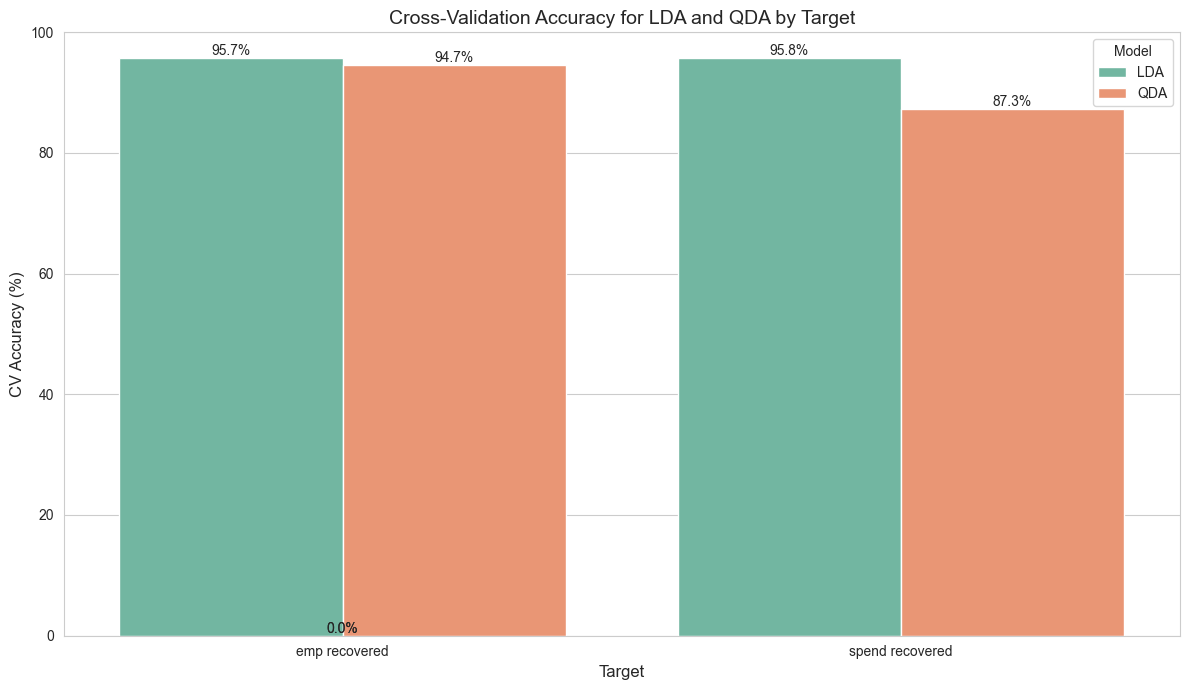

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copy and prepare the data
plot_df = cv_results_df.copy()
plot_df['CV Accuracy (%)'] = plot_df['CV Accuracy Mean'] * 100

# Set up the figure
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

# Create grouped barplot
ax = sns.barplot(
    data=plot_df,
    x='Target',
    y='CV Accuracy (%)',
    hue='Model',
    palette='Set2'
)

# Annotate bars with exact values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

# Labels and title
plt.title('Cross-Validation Accuracy for LDA and QDA by Target', fontsize=14)
plt.ylabel('CV Accuracy (%)', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


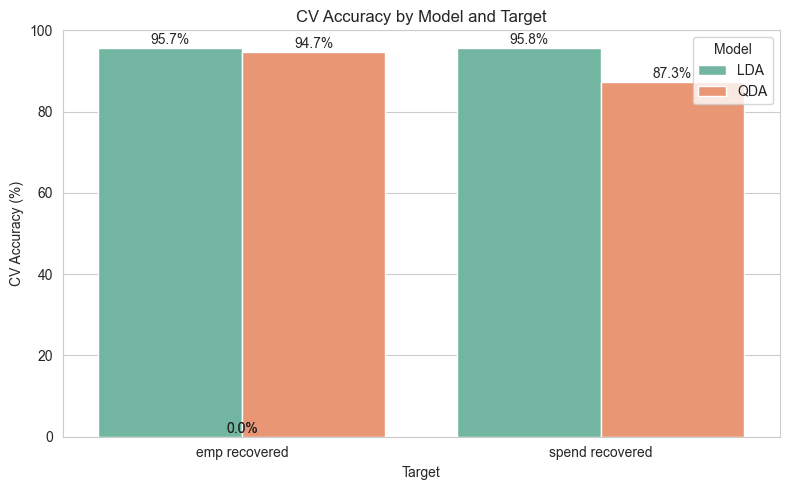

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
plot_df = cv_results_df.copy()  # your CV results
plot_df['CV Accuracy (%)'] = plot_df['CV Accuracy Mean'] * 100

plt.figure(figsize=(8,5))
sns.barplot(
    data=plot_df,
    x='Target',
    y='CV Accuracy (%)',
    hue='Model',
    palette='Set2'
)
plt.title('CV Accuracy by Model and Target')
plt.ylabel('CV Accuracy (%)')
plt.ylim(0, 100)

# Annotate exact values on bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2., height + 1, f'{height:.1f}%', ha='center')

plt.tight_layout()
plt.show()


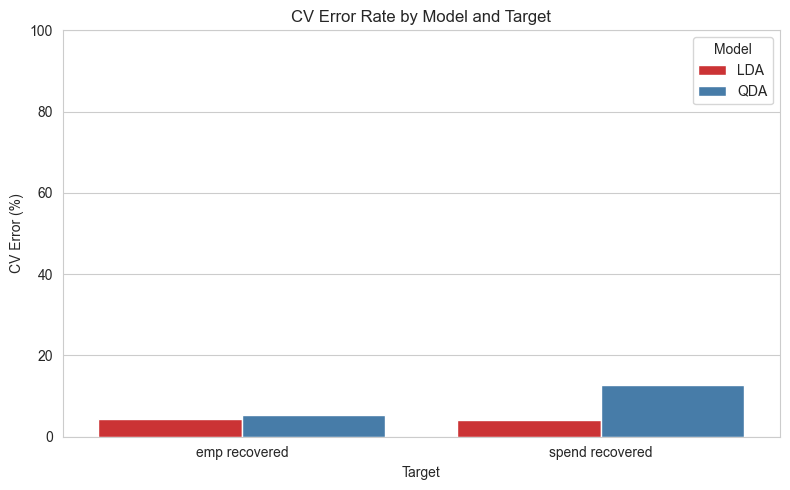

In [83]:
plot_df['CV Error (%)'] = plot_df['CV Error Mean'] * 100

plt.figure(figsize=(8,5))
sns.barplot(
    data=plot_df,
    x='Target',
    y='CV Error (%)',
    hue='Model',
    palette='Set1'
)
plt.title('CV Error Rate by Model and Target')
plt.ylabel('CV Error (%)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


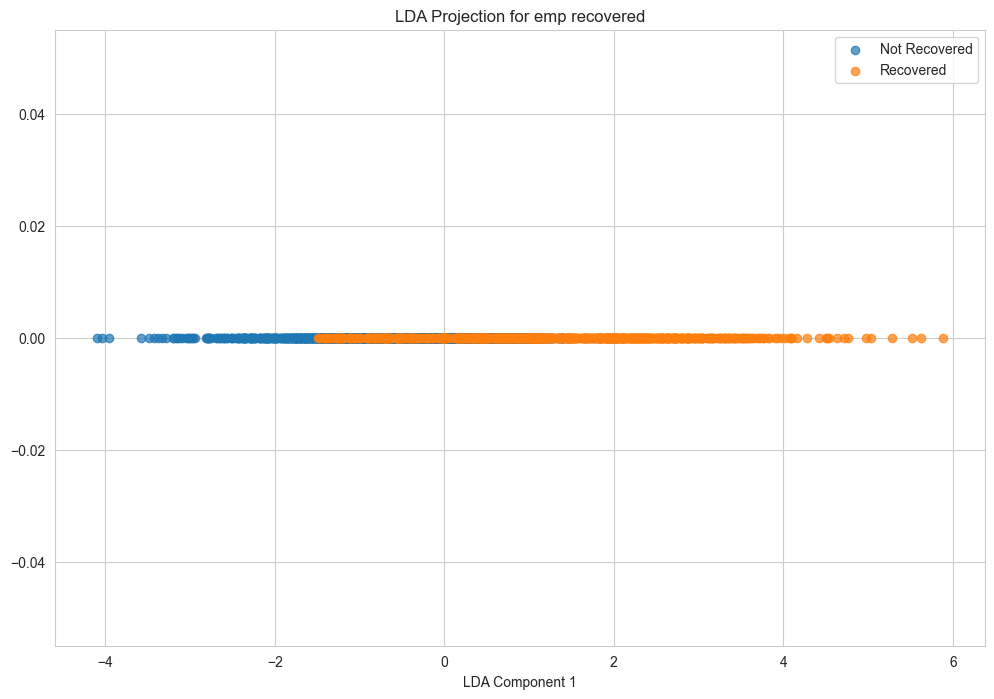

In [84]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = data[['emp leisure hospitality', 'emp trade_transport utilities']]  # example
y = data['emp recovered'].astype(int)

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(12,8))
plt.scatter(X_lda[y==0], np.zeros(sum(y==0)), label='Not Recovered', alpha=0.7)
plt.scatter(X_lda[y==1], np.zeros(sum(y==1)), label='Recovered', alpha=0.7)
plt.xlabel('LDA Component 1')
plt.title('LDA Projection for emp recovered')
plt.legend()
plt.show()


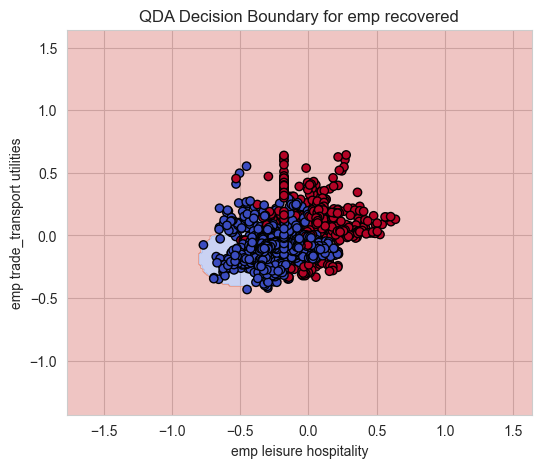

In [85]:
import numpy as np

X = data[['emp leisure hospitality', 'emp trade_transport utilities']].values
y = data['emp recovered'].astype(int).values
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

# Create meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel('emp leisure hospitality')
plt.ylabel('emp trade_transport utilities')
plt.title('QDA Decision Boundary for emp recovered')
plt.show()
